In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt

#read data from csv
df = pd.read_csv('data/sea_levels_1880_2014.csv')

print(df.head())
print(df.info())

         Time   GMSL  GMSL uncertainty
0  1880-01-15 -183.0              24.2
1  1880-02-15 -171.1              24.2
2  1880-03-15 -164.3              24.2
3  1880-04-15 -158.2              24.2
4  1880-05-15 -158.7              24.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB
None


In [2]:
# Convert 'time' to datetime format
df['Time'] = pd.to_datetime(df['Time'])
df['year'] = df['Time'].dt.year

df.to_excel('data/gmsl.xlsx', index=False)

In [3]:
#Group by year
annual_gmsl = df.groupby('year')['GMSL'].mean()
annual_gmsl_uncertainty = df.groupby('year')['GMSL uncertainty'].mean()

print(annual_gmsl)
print(annual_gmsl_uncertainty)


year
1880   -158.725000
1881   -153.058333
1882   -169.883333
1883   -164.591667
1884   -143.750000
           ...    
2009     58.016667
2010     65.750000
2011     67.300000
2012     76.083333
2013     67.725000
Name: GMSL, Length: 134, dtype: float64
year
1880    24.200000
1881    24.200000
1882    23.008333
1883    22.800000
1884    22.200000
          ...    
2009     6.883333
2010     7.116667
2011     7.550000
2012     8.300000
2013     8.841667
Name: GMSL uncertainty, Length: 134, dtype: float64


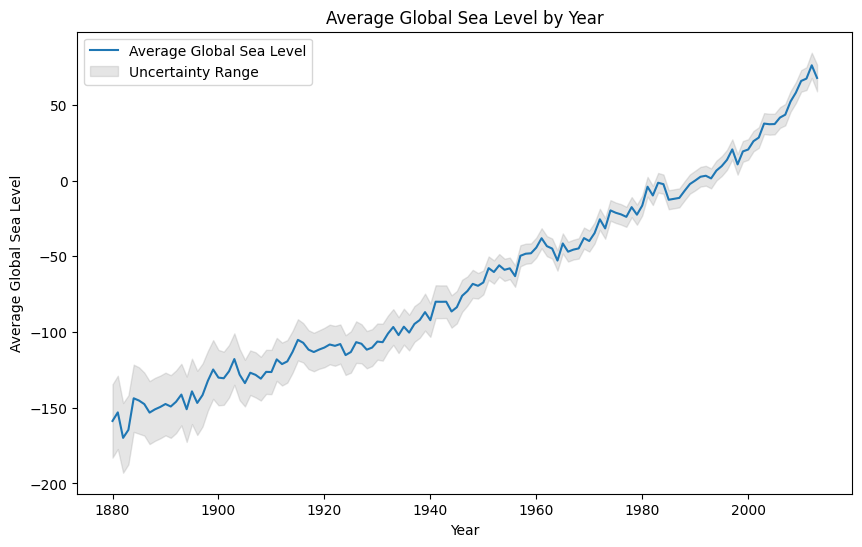

In [4]:
plt.figure(figsize=(10, 6))
annual_gmsl.plot(label='Average Global Sea Level')
plt.fill_between(annual_gmsl.index, annual_gmsl - annual_gmsl_uncertainty, annual_gmsl + annual_gmsl_uncertainty, color='gray', alpha=0.2, label='Uncertainty Range')
plt.xlabel('Year')
plt.ylabel('Average Global Sea Level')
plt.title('Average Global Sea Level by Year')
plt.legend()


plt.savefig('global_sea_level.png', dpi=300)

plt.show()

